(9413, 6)
(6,)
[[  6.548828    5.153076    2.0737305 -26.852783   35.08716    19.462158 ]
 [ -1.4511719  -1.8469238  10.07373   -74.85278   -22.912842   -7.537842 ]
 [ -4.451172   -3.8469238 -10.92627   -21.852783   -0.9128418  -9.537842 ]
 [ -2.4511719  -3.8469238   1.0737305 -25.852783  -24.912842   -4.537842 ]
 [ -1.4511719  -0.8469238  -8.92627   -17.852783    7.087158   -5.537842 ]]


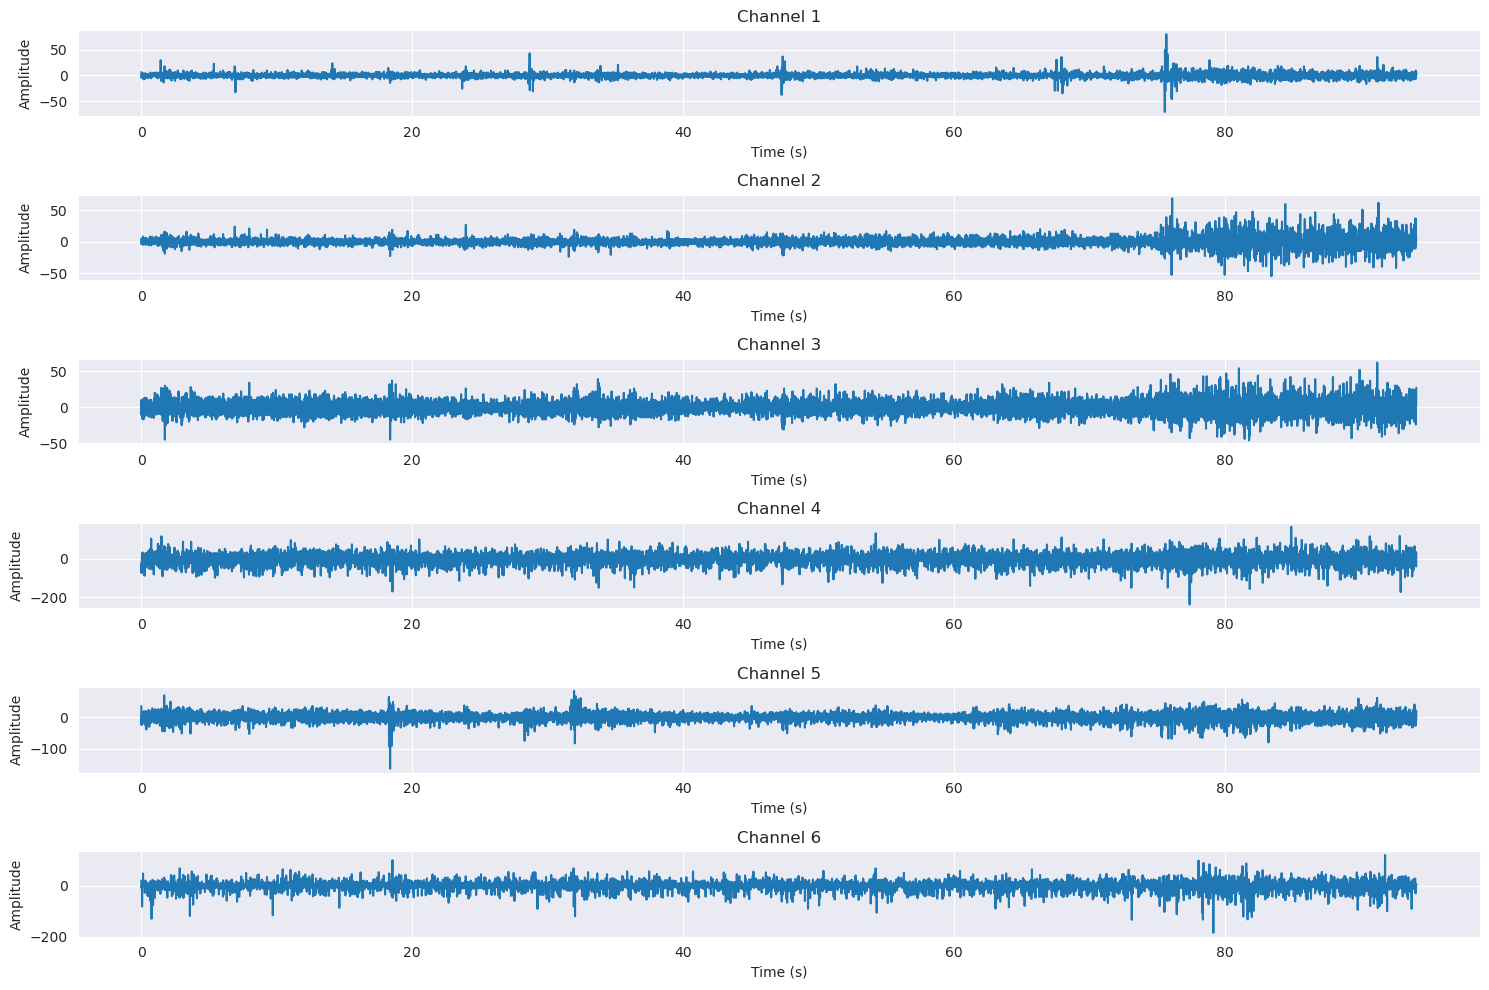

In [3]:
import os

import numpy as np
import pandas as pd
from matplotlib.figure import SubplotParams
import matplotlib.pyplot as plt
root='./data/2'
file='emg_left_arm_2_2.csv'
sample_rate = 100
path = os.path.join(root, file)
data = pd.read_csv(path, header=1)
data = np.array(data)
data = data[:, 2:8].astype(np.float32)
print(data.shape)
col_means = data.mean(axis=0)
print(col_means.shape)
# 从每一列中减去其平均值去除直流偏置
data = data - col_means
print(data[:5, :])


# 定义时间轴，假设采样率是sample_rate
time = np.arange(data.shape[0]) / sample_rate

# 创建一个绘图
plt.figure(figsize=(15, 10))

# 绘制每个通道的肌电图
for i in range(data.shape[1]):
    plt.subplot(data.shape[1], 1, i + 1)
    plt.plot(time, data[:, i])
    plt.title(f'Channel {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# 原始数据

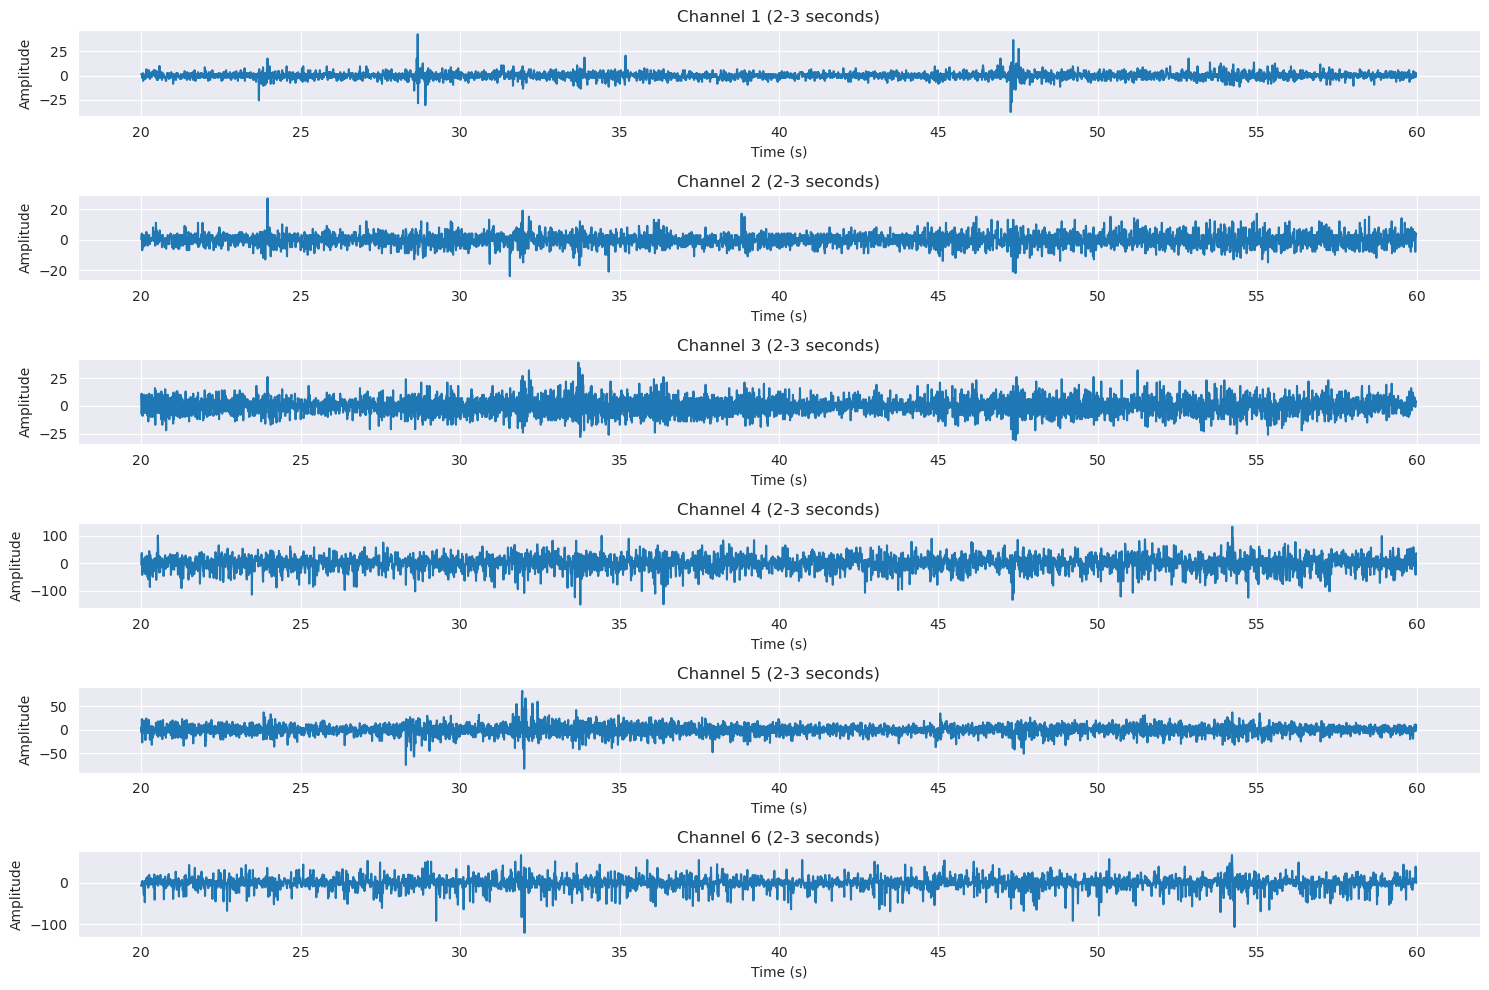

In [20]:


# 定义时间轴
time = np.arange(data.shape[0]) / sample_rate

# 定位20 - 60秒之间的数据
start = 20 * sample_rate  # 秒的起始点
end = 60* sample_rate    # 秒的终止点

# 限定时间轴和数据范围
time_segment = time[start:end]
data_segment = data[start:end, :]

# 创建一个绘图
plt.figure(figsize=(15, 10))

# 绘制每个通道的肌电图，只显示500-600秒之间的数据
for i in range(data_segment.shape[1]):
    plt.subplot(data_segment.shape[1], 1, i + 1)
    plt.plot(time_segment, data_segment[:, i])
    plt.title(f'Channel {i+1} (20-60 seconds)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


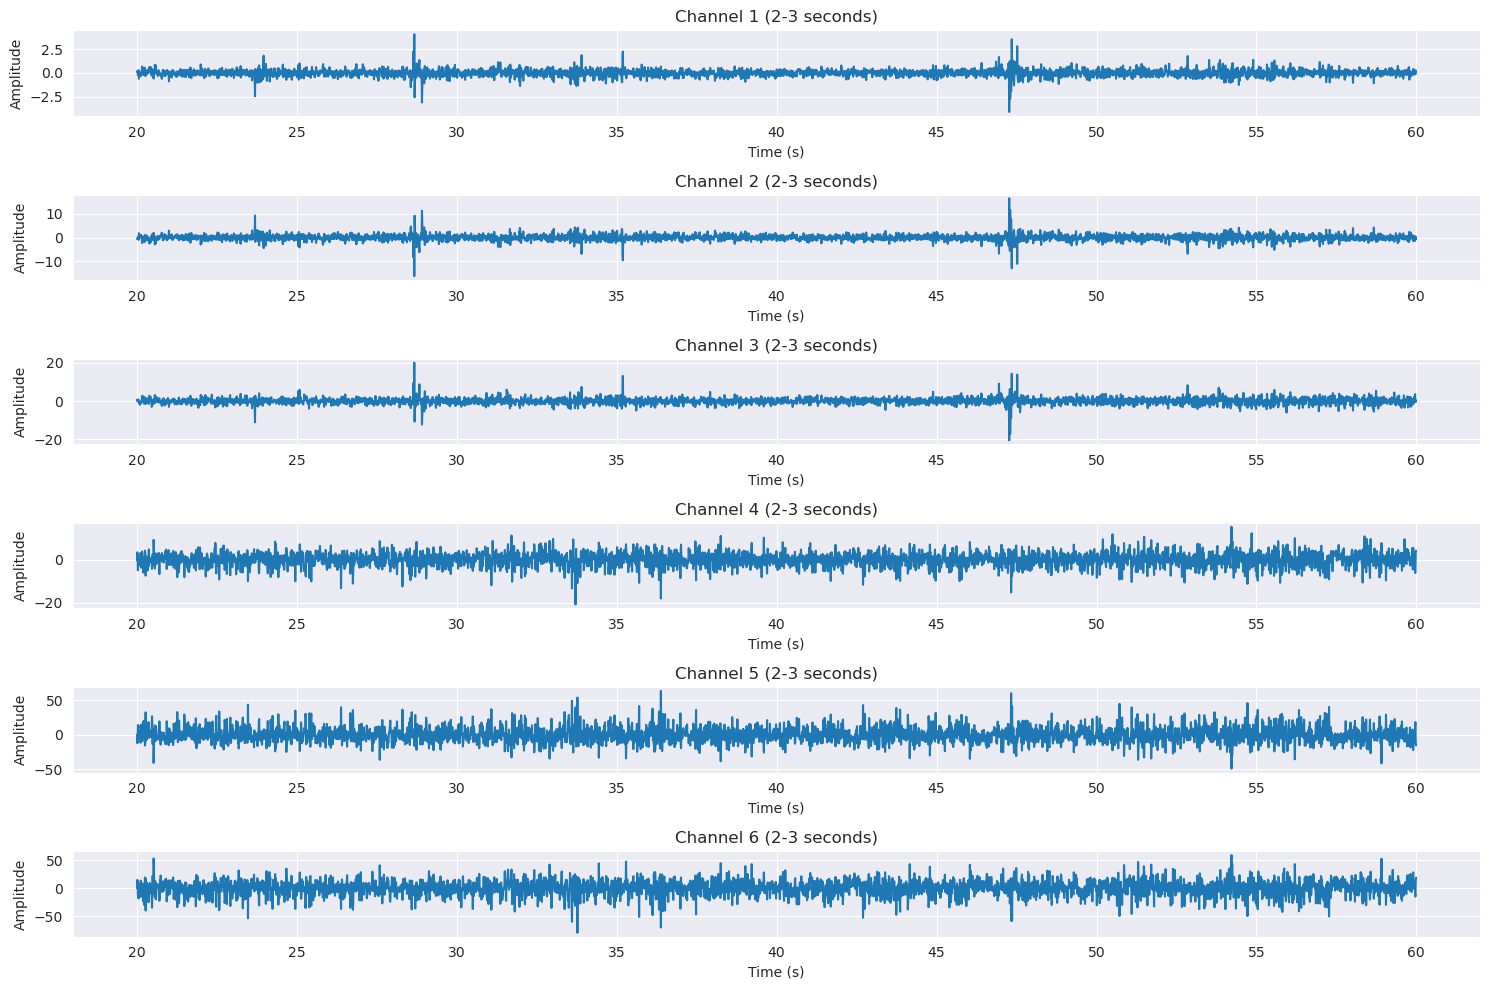

In [33]:
from scipy import signal
from scipy.signal import butter, sosfilt

def highpass_filter(data, fs, cutoff=20, order=5):
    nyq = 0.5 * fs  # 计算Nyquist频率
    normal_cutoff = cutoff / nyq  # 归一化截止频率
    sos = butter(order, normal_cutoff, btype='high', analog=False, output='sos')
    filtered_data = sosfilt(sos, data)
    return filtered_data

# 示例参数
fs = 100  # 采样率为100Hz
cutoff = 20  # 高通滤波器的截止频率为20Hz


f0 = 50  # 工频干扰为50Hz

# 计算滤波器系数
nyquist = 0.5 * fs
# b, a = signal.butter(4, [low, high], btype='band')

 # 计算陷波滤波器系数
Q = 30  # 陷波滤波器的Q值为30
w0 = f0 / nyquist
b_notch, a_notch = signal.iirnotch(w0, Q)
#低通
data = highpass_filter(data, fs, cutoff)
# 进行陷波滤波
data = signal.filtfilt(b_notch, a_notch, data, axis=0)


# 定义时间轴
time = np.arange(data.shape[0]) / sample_rate

# 定位500-600秒之间的数据
start = 20 * sample_rate  # 秒的起始点
end = 60* sample_rate    # 秒的终止点

# 限定时间轴和数据范围
time_segment = time[start:end]
data_segment = data[start:end, :]

# 创建一个绘图
plt.figure(figsize=(15, 10))

# 绘制每个通道的肌电图，只显示500-600秒之间的数据
for i in range(data_segment.shape[1]):
    plt.subplot(data_segment.shape[1], 1, i + 1)
    plt.plot(time_segment, data_segment[:, i])
    plt.title(f'Channel {i+1} (2-3 seconds)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


整流 线性包络

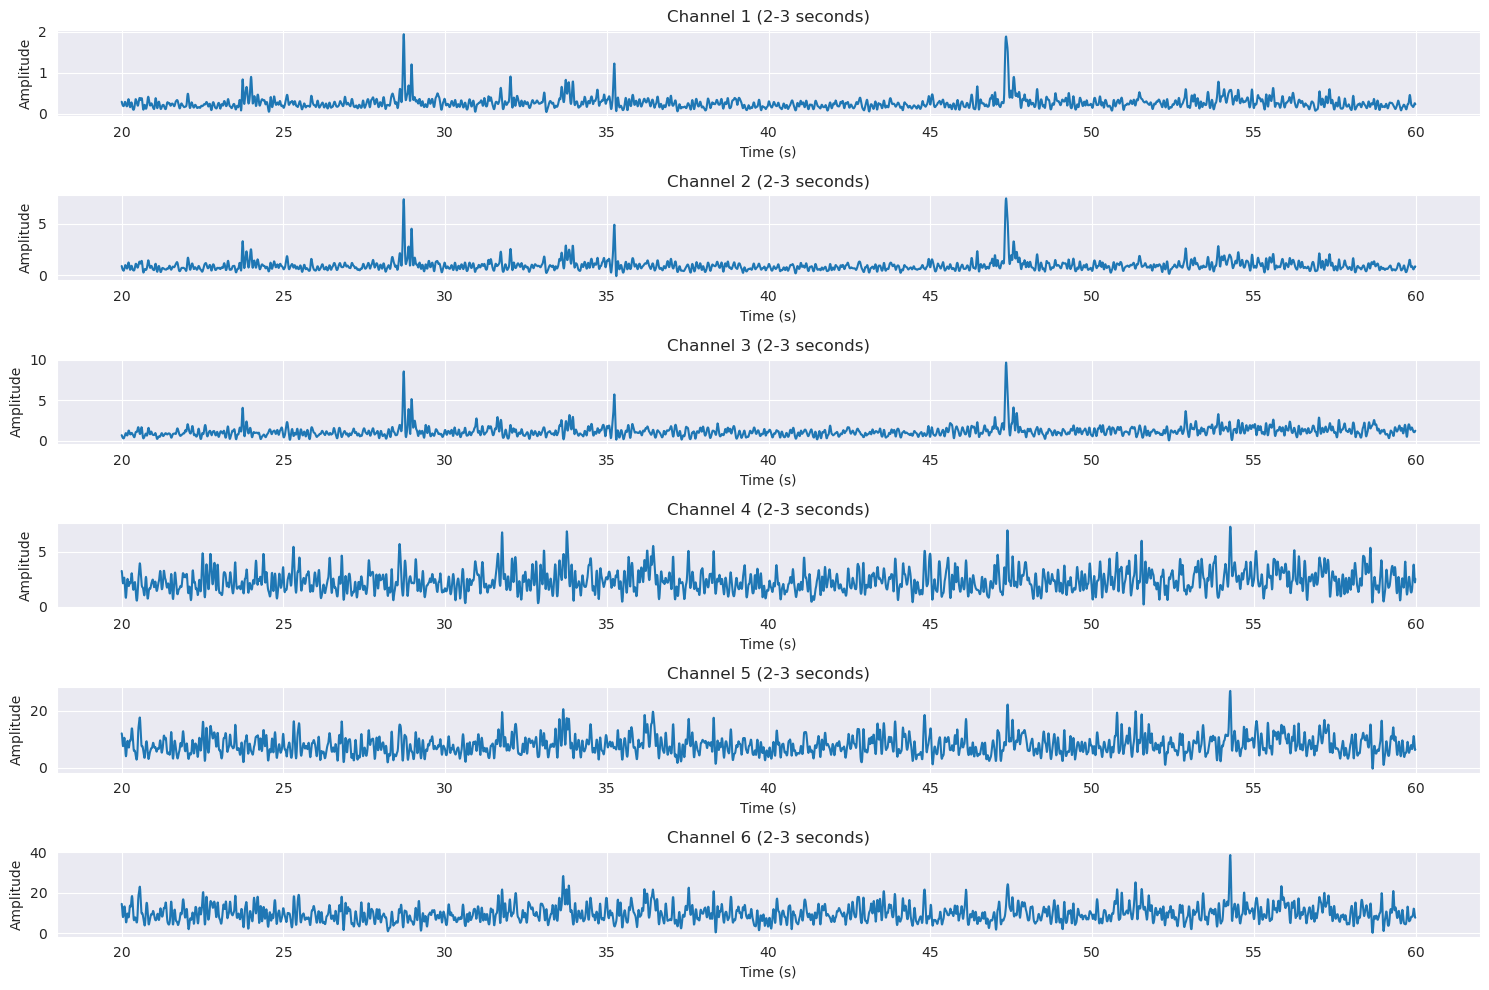

In [35]:
rectified_data = np.abs(data)

def calculate_envelope(signal, fs, cutoff=10, order=4):
    """
    计算信号的线性包络。
    
    参数:
    - signal: 输入信号，全波整流后的信号。
    - fs: 采样频率。
    - cutoff: 低通滤波器的截止频率。
    - order: 滤波器的阶数。
    
    返回:
    - 线性包络信号。
    """
    nyq = 0.5 * fs  # Nyquist频率
    normal_cutoff = cutoff / nyq  # 归一化截止频率
    sos = butter(order, normal_cutoff, btype='low', analog=False, output='sos')
    envelope = sosfilt(sos, signal)
    return envelope

# 示例参数
fs = 100  # 采样率为100Hz

# 假设rectified_data是全波整流后的数据，它是一个二维NumPy数组，其中每列代表一个信号通道
# rectified_data = ...

# 计算每个通道的线性包络
envelope = np.zeros_like(rectified_data)  # 初始化包络信号数组
for i in range(rectified_data.shape[1]):  # 遍历每个通道
    envelope[:, i] = calculate_envelope(rectified_data[:, i], fs)
data=envelope
# envelope现在包含了每个通道的线性包络
# 定义时间轴
time = np.arange(data.shape[0]) / sample_rate

# 定位500-600秒之间的数据
start = 20 * sample_rate  # 秒的起始点
end = 60* sample_rate    # 秒的终止点

# 限定时间轴和数据范围
time_segment = time[start:end]
data_segment = data[start:end, :]

# 创建一个绘图
plt.figure(figsize=(15, 10))

# 绘制每个通道的肌电图，只显示500-600秒之间的数据
for i in range(data_segment.shape[1]):
    plt.subplot(data_segment.shape[1], 1, i + 1)
    plt.plot(time_segment, data_segment[:, i])
    plt.title(f'Channel {i+1} (2-3 seconds)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
